In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [23]:
df = pd.read_csv("train_A_derma.csv")

In [24]:
df.head()

,Id,Lession,Genetic Propensity,Skin X test,Skin color,Small size,Mid size,Large size,Mid,Small,Large,Doughnuts consumption,Fake/Real
0,0,1.0,-1.27713,4.0,NaN,0.0,NaN,0.0,1.0,NaN,NaN,1.234125,real
1,1,NaN,-1.84207,3.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,1.216756,real
2,2,NaN,-1.82290,3.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,1.264342,real
3,3,1.0,-1.36049,3.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,1.126842,real
4,4,NaN,NaN,2.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.198014,fake


In [25]:
To find Missing Data

SyntaxError: invalid syntax (6459930.py, line 1)

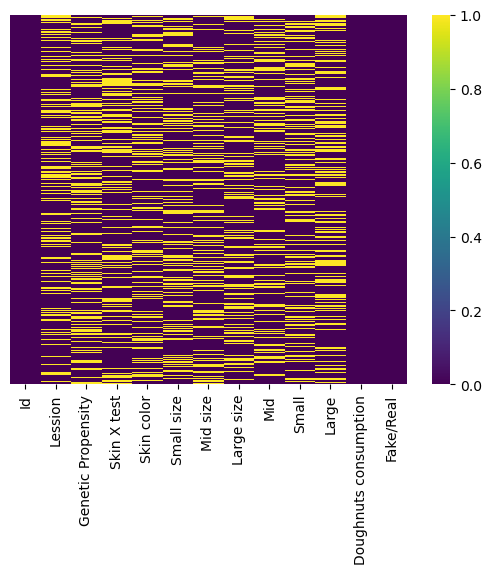

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')
plt.show()

In [44]:
print("\n--- Data Shape ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n--- Columns & Data Types ---")
for column in df.columns:
    print(f"Column: {column}, dtype: {df[column].dtype}")
print("\n--- Info Summary ---")
print(df.info())


--- Data Shape ---
Rows: 597, Columns: 13

--- Columns & Data Types ---
Column: Id, dtype: int64
Column: Lession, dtype: float64
Column: Genetic Propensity, dtype: float64
Column: Skin X test, dtype: float64
Column: Skin color, dtype: float64
Column: Small size, dtype: float64
Column: Mid size, dtype: float64
Column: Large size, dtype: float64
Column: Mid, dtype: float64
Column: Small, dtype: float64
Column: Large, dtype: float64
Column: Doughnuts consumption, dtype: float64
Column: Fake/Real, dtype: object

--- Info Summary ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     597 non-null    int64  
 1   Lession                407 non-null    float64
 2   Genetic Propensity     403 non-null    float64
 3   Skin X test            422 non-null    float64
 4   Skin color             420 non-null    flo

In [45]:
print("\n--- Numeric Summary ---")
print(df.describe())

print("\n--- Categorical Summary ---")
print(df.describe(include='object'))


--- Numeric Summary ---
               Id     Lession  Genetic Propensity  Skin X test  Skin color  \
count  597.000000  407.000000          403.000000   422.000000  420.000000   
mean   298.000000    0.115479           -1.883260     3.106635    0.390476   
std    172.483333    0.319993            0.576935     0.783138    0.488439   
min      0.000000    0.000000           -3.420110     1.000000    0.000000   
25%    149.000000    0.000000           -2.164220     3.000000    0.000000   
50%    298.000000    0.000000           -2.164220     3.000000    0.000000   
75%    447.000000    0.000000           -1.519920     4.000000    1.000000   
max    596.000000    1.000000            0.349500     4.000000    1.000000   

       Small size    Mid size  Large size         Mid       Small       Large  \
count  413.000000  424.000000  417.000000  422.000000  413.000000  407.000000   
mean     0.322034    0.127358    0.196643    0.251185    0.336562    0.385749   
std      0.467823    0.333768

In [48]:
# ===  Calculating the correlation with doughnut consumption ===
corr = df.corr(numeric_only=True)['Doughnuts consumption'].sort_values(ascending=False)
corr_rounded = corr.round(2)
print("--- Correlation with Doughnuts consumption ---")
print(corr_rounded)

--- Correlation with Doughnuts consumption ---
Doughnuts consumption    1.00
Large size               0.38
Genetic Propensity       0.30
Mid size                 0.27
Small size               0.23
Lession                  0.22
Small                    0.18
Skin X test              0.18
Skin color               0.16
Id                       0.02
Mid                     -0.04
Large                   -0.13
Name: Doughnuts consumption, dtype: float64


In [29]:
# === 4. Set the relevance threshold ===
corr_threshold = 0.3   # 可调整：越高表示只对强相关变量做回归插补

In [30]:
df1 = df.copy()

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [57]:
def impute_both_columns(cols):
    genetic_prop, large_size, doughnuts = cols[0], cols[1], cols[2]
    
    #if Genetic Propensity missing
    if pd.isnull(genetic_prop):
        # Based Doughnuts consumption 
        if doughnuts < df['Doughnuts consumption'].median():
            return df[df['Doughnuts consumption'] < df['Doughnuts consumption'].median()]['Genetic Propensity'].median()
        else:
            return df[df['Doughnuts consumption'] >= df['Doughnuts consumption'].median()]['Genetic Propensity'].median()
    else:
        return genetic_prop

    #if Large size missing
    if pd.isnull(large_size):
        # Based Doughnuts consumption 
        if doughnuts < df['Doughnuts consumption'].median():
            return df[df['Doughnuts consumption'] < df['Doughnuts consumption'].median()]['Large size'].median()
        else:
            return df[df['Doughnuts consumption'] >= df['Doughnuts consumption'].median()]['Large size'].median()
    else:
        return large_size


In [58]:
df['Genetic Propensity'] = df[['Genetic Propensity', 'Doughnuts consumption']].apply(impute_genetic_propensity, axis=1)
df['Large size'] = df[['Large size', 'Doughnuts consumption']].apply(impute_large_size, axis=1)

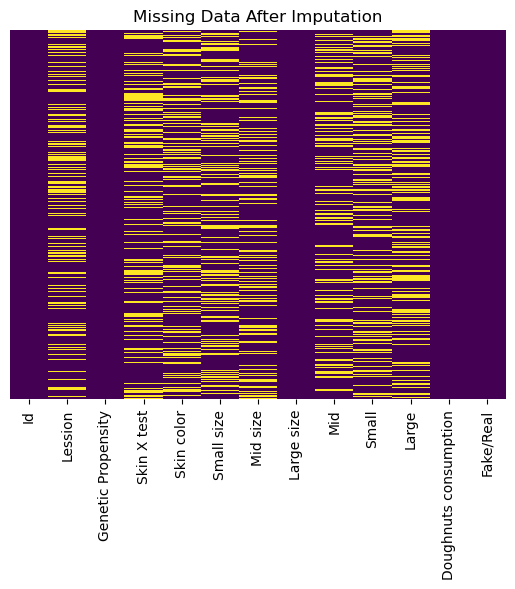

--- Missing Values After ---
Id                         0
Lession                  190
Genetic Propensity         0
Skin X test              175
Skin color               177
Small size               184
Mid size                 173
Large size                 0
Mid                      175
Small                    184
Large                    190
Doughnuts consumption      0
Fake/Real                  0
dtype: int64


In [59]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Data After Imputation")
plt.show()

print("--- Missing Values After ---")
print(df.isnull().sum())
